In [1]:
import numpy as np
import pandas as pd
import psycopg2
from psycopg2.extras import execute_values

In [25]:
import matplotlib.pyplot as plt

In [3]:
# Connect to Heroku database
try:
        conn = psycopg2.connect(host='ec2-52-201-66-148.compute-1.amazonaws.com', database='d44ns4ruujn4nq', port=5432,
                                user='ub5debmb55aodh', password='pe6a56f3002c3f1181d1a34e26d9a90636fdd56e1156bf39a6b8ff158a49bf163')
        print("successfully connected to database")
except:
        print("I am unable to connect to the database")

successfully connected to database


In [4]:
# cursor
cur = conn.cursor()

get_cols_query = "SELECT * from rawparceltable;"
sample_data = [];
try: 
    cur.execute(get_cols_query)
    sample_data = cur.fetchall()
    
    print("query successful")
except:
    print("query failed")

    
print(sample_data[0:10])

query successful
[('8765001012', '91765-4018', '2021', 'Commercial', '53135', '5361010', '2017', 'Y', '33.985062650000003', '-117.84578183000001'), ('8765001007', '91765-4012', '2021', 'Commercial', '35582', '1548930', '1998', 'Y', '33.984886459999998', '-117.84443419'), ('8765001011', '91765-4022', '2021', 'Commercial', '20748', '2144404', '2017', 'Y', '33.984520269999997', '-117.84567337999999'), ('8765014026', '91765-3479', '2021', 'Commercial', '21300', '2831268', '2014', 'Y', '33.969803720000002', '-117.84968676'), ('8765001010', '91765-4001', '2021', 'Commercial', '9145', '1421739', '2016', 'Y', '33.986564299999998', '-117.84388033'), ('8765001009', '91765-4009', '2021', 'Commercial', '22080', '545804', '1998', 'Y', '33.985976469999997', '-117.8440932'), ('8765001013', '91765-4028', '2021', 'Commercial', '68715', '7000000', '2006', 'Y', '33.984608369999997', '-117.8472929'), ('8765001008', '91765-4015', '2021', 'Commercial', '9230', '715449', '1998', 'Y', '33.985513949999998', '-

In [5]:
df = pd.DataFrame(sample_data, columns=['ain','situszip', 
        'rollyear',
        'usecodedescchar1',  
        'sqftmain',
        'roll_landvalue',
        'roll_landbaseyear',  
        'istaxableparcel',
        'center_lat',
        'center_lon'])

In [6]:
df

,ain,situszip,rollyear,usecodedescchar1,sqftmain,roll_landvalue,roll_landbaseyear,istaxableparcel,center_lat,center_lon
0,8765001012,91765-4018,2021,Commercial,53135,5361010,2017,Y,33.985062650000003,-117.84578183000001
1,8765001007,91765-4012,2021,Commercial,35582,1548930,1998,Y,33.984886459999998,-117.84443419
2,8765001011,91765-4022,2021,Commercial,20748,2144404,2017,Y,33.984520269999997,-117.84567337999999
3,8765014026,91765-3479,2021,Commercial,21300,2831268,2014,Y,33.969803720000002,-117.84968676
4,8765001010,91765-4001,2021,Commercial,9145,1421739,2016,Y,33.986564299999998,-117.84388033
...,...,...,...,...,...,...,...,...,...,...
887,8640007036,91740-4808,2021,Commercial,1750,151554,2020,Y,34.122579229999999,-117.87144103
888,8639017015,91741-6205,2021,Commercial,2280,299783,2015,Y,34.130482790000002,-117.86694854
889,8639001002,91741-4205,2021,Commercial,49920,2621753,2014,Y,34.133712320000001,-117.87195149999999
890,8643006028,91740-5964,2021,Commercial,3040,110042,1984,Y,34.106922419999997,-117.86699790999999


In [11]:
df['roll_landbaseyear'] = df['roll_landbaseyear'].astype(int)

In [13]:
df['rollyear'] = df['rollyear'].astype(int)

In [18]:
df['roll_landvalue'] = df['roll_landvalue'].astype(float)
df['sqftmain'] = df['sqftmain'].astype(float)

In [16]:
column_1 = df['roll_landbaseyear']
column_2 = df['roll_landvalue']
correlation = column_1.corr(column_2)
correlation

0.21031241002173726

In [19]:
column_1 = df['sqftmain']
column_2 = df['roll_landvalue']
correlation = column_1.corr(column_2)
correlation

0.6616247419108581

In [20]:
column_1 = df['rollyear']
column_2 = df['roll_landvalue']
correlation = column_1.corr(column_2)
correlation

nan

In [21]:
column_1 = df['roll_landbaseyear']
column_2 = df['roll_landvalue']
correlation = column_1.corr(column_2)
correlation

0.21031241002173726

<AxesSubplot:xlabel='situszip'>

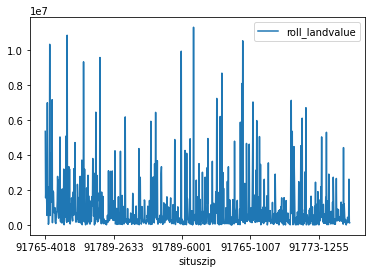

In [27]:
df.plot(x='situszip',y='roll_landvalue')